In [1]:
import sklearn

sklearn.__version__

'0.24.1'

In [2]:
from sklearn.datasets import fetch_openml

import matplotlib as mpl
import matplotlib.pyplot as plt

# 딕셔너리 형태로 데이터를 가져옴
# Warning: since Scikit-Learn 0.24, fetch_openml() returns a Pandas DataFrame by default. To avoid this and keep the same code as in the book, we use as_frame=False.
mnist = fetch_openml('mnist_784', version=1, as_frame=False)

In [3]:
print(mnist.keys())

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
X, y = mnist["data"], mnist["target"] # y data type : string

In [5]:
X.shape

# (70000, 784)
# 70,000개의 이미지 / 각 이미지는 784(이미지 크기 28*28 픽셀)개의 특성 가짐
# 하나의 픽셀 = 하나의 특성
# 하나의 픽셀은 0(흰색)~255(검은색)까지의 픽셀 강도를 나타냄

(70000, 784)

In [6]:
len(X)

70000

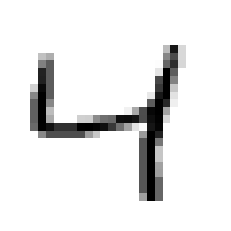

In [7]:
part_digit = X[2] # X의 3번째 사진
part_digit_image = part_digit.reshape(28, 28)

plt.imshow(part_digit_image, cmap="binary")
plt.axis("off")
plt.show()

In [8]:
part_digit_image

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

In [9]:
import numpy as np

y = y.astype(np.uint8) # 객체의 데이터 타입을 괄호 안에 있는 걸로 변경

In [10]:
# MNIST 데이터셋 자체가 앞쪽 60,000개는 훈련용, 나머지는 테스트용으로 나눠놨음
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### 이진 분류기 훈련 : 하나의 숫자만 판별해보기

In [11]:
y_train_5 = (y_train == 6) # 6는 True고, 다른 숫자는 모두 False
y_test_5 = (y_test == 6)

In [12]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)

In [13]:
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [14]:
sgd_clf.predict([part_digit])

array([False])

In [15]:
[part_digit]

[array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 

### 다중 분류

In [16]:
from sklearn.svm import SVC

svm_clf = SVC()               # SVm for Classification
svm_clf.fit(X_train, y_train) # y_train_5가 아니고 y_train 사용

SVC()

In [17]:
svm_clf.predict([part_digit])

array([4], dtype=uint8)